Chapter 19

# 典型相关分析
Book_7《机器学习》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
from sklearn.cross_decomposition import CCA
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.datasets import load_iris

In [2]:
# Load the iris data
iris_sns = sns.load_dataset("iris") 

#%% heatmap of iris data

X_df = iris_sns[['sepal_length', 'sepal_width', 
                 'petal_length', 'petal_width']]

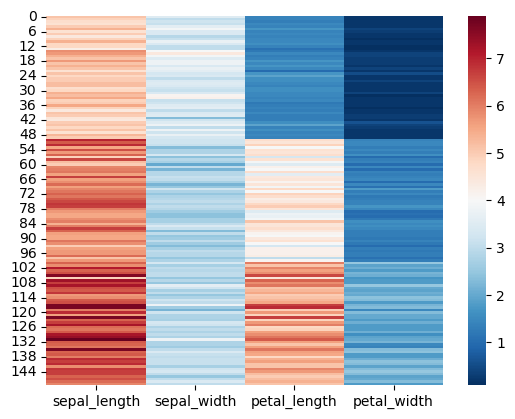

In [3]:
fig, axs = plt.subplots()

h = sns.heatmap(X_df,cmap='RdBu_r')
# h.set_aspect("equal")

#%% correlation of iris data

C:\Users\james\AppData\Local\Temp\ipykernel_8644\2331532028.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  h = sns.heatmap(iris_sns.corr(),cmap='RdBu_r', linewidths=.05,


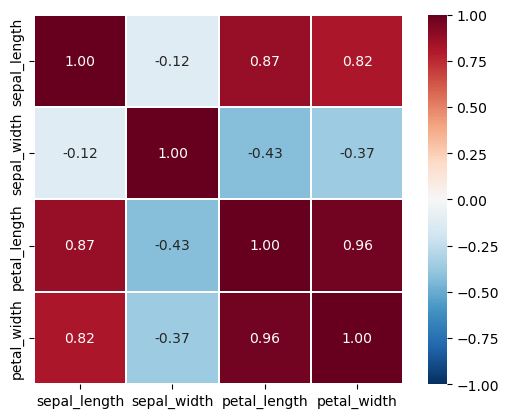

In [4]:
fig, axs = plt.subplots()

h = sns.heatmap(iris_sns.corr(),cmap='RdBu_r', linewidths=.05,
                vmax = 1, vmin = -1,
                annot=True,fmt='.2f')
h.set_aspect("equal")

In [5]:
#%% seperate the data set into X and Y

# Sepal
X = iris_sns[['sepal_length', 'sepal_width']]

# Petal
Y = iris_sns[['petal_length', 'petal_width']]

In [6]:
#%% Canonical Correlation Analysis

Iris_CCA = CCA(n_components=2)
# only centra
Iris_CCA.fit(X, Y)
S, T = Iris_CCA.transform(X, Y)

# S.mean(axis = 0) # test only
# T.mean(axis = 0) # test only

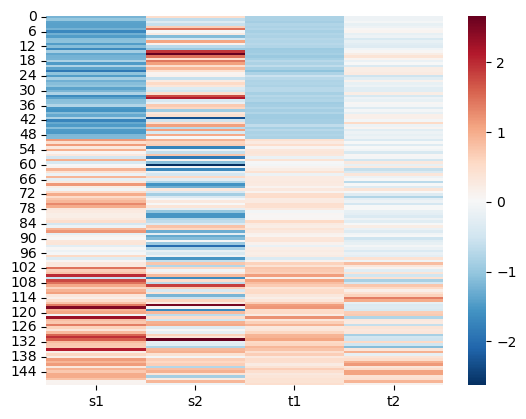

In [7]:
#%% visualize the results

S_T_df = pd.DataFrame({"s1":S[:, 0],
                       "s2":S[:, 1],
                       "t1":T[:, 0],
                       "t2":T[:, 1]})

fig, axs = plt.subplots()

h = sns.heatmap(S_T_df,cmap='RdBu_r')
# h.set_aspect("equal")

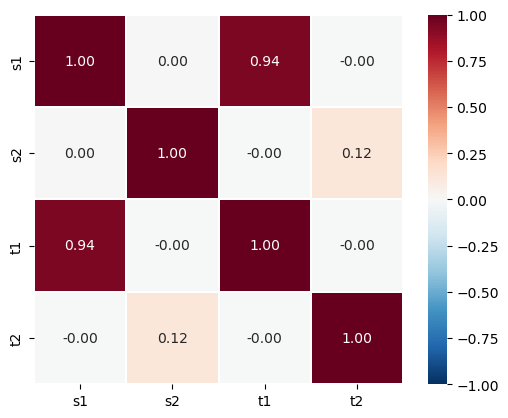

In [8]:
fig, axs = plt.subplots()

h = sns.heatmap(S_T_df.corr(),cmap='RdBu_r', 
                linewidths=.05,
                vmax = 1, vmin = -1,
                annot=True,fmt='.2f')
h.set_aspect("equal")

# test only
# print(S_T_df.mean())

#%%

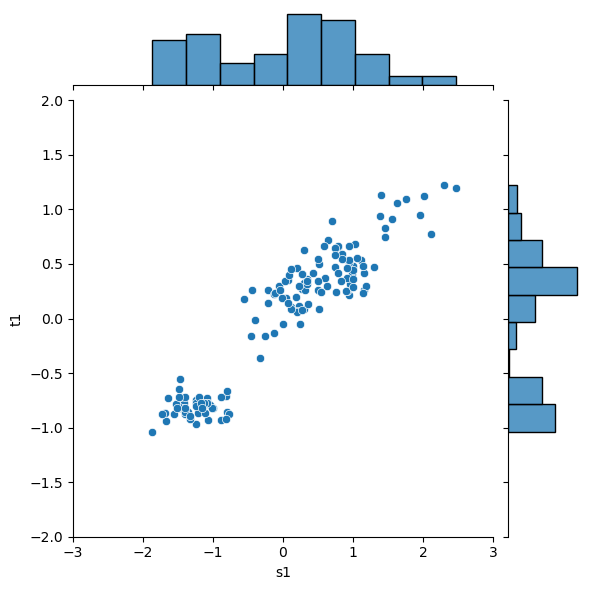

In [9]:
#%% scatter with marginals

sns.jointplot(data=S_T_df, x="s1", y="t1", 
              xlim = (-3,3), ylim = (-2,2))

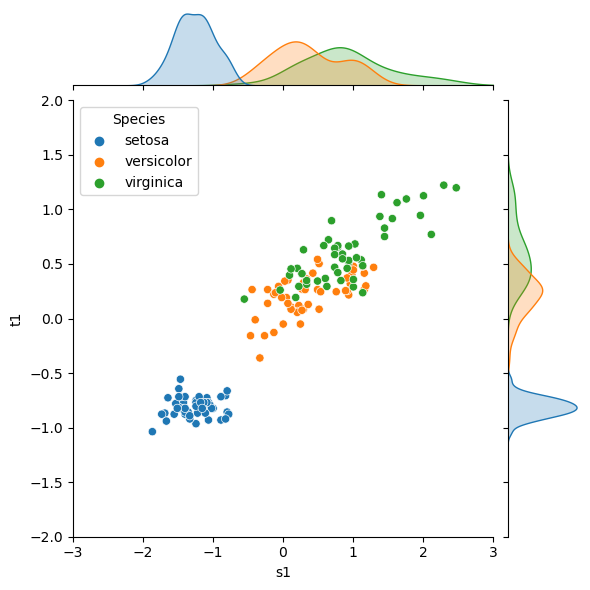

In [10]:
#%% scatter with marginals, consider lables

S_T_df_species = pd.DataFrame({"s1":S[:, 0],
                        "s2":S[:, 1],
                        "t1":T[:, 0],
                        "t2":T[:, 1],
                        "Species":iris_sns.species.tolist()})


sns.jointplot(data=S_T_df_species, 
              x="s1", y="t1", 
              hue = 'Species',
              xlim = (-3,3), ylim = (-2,2))

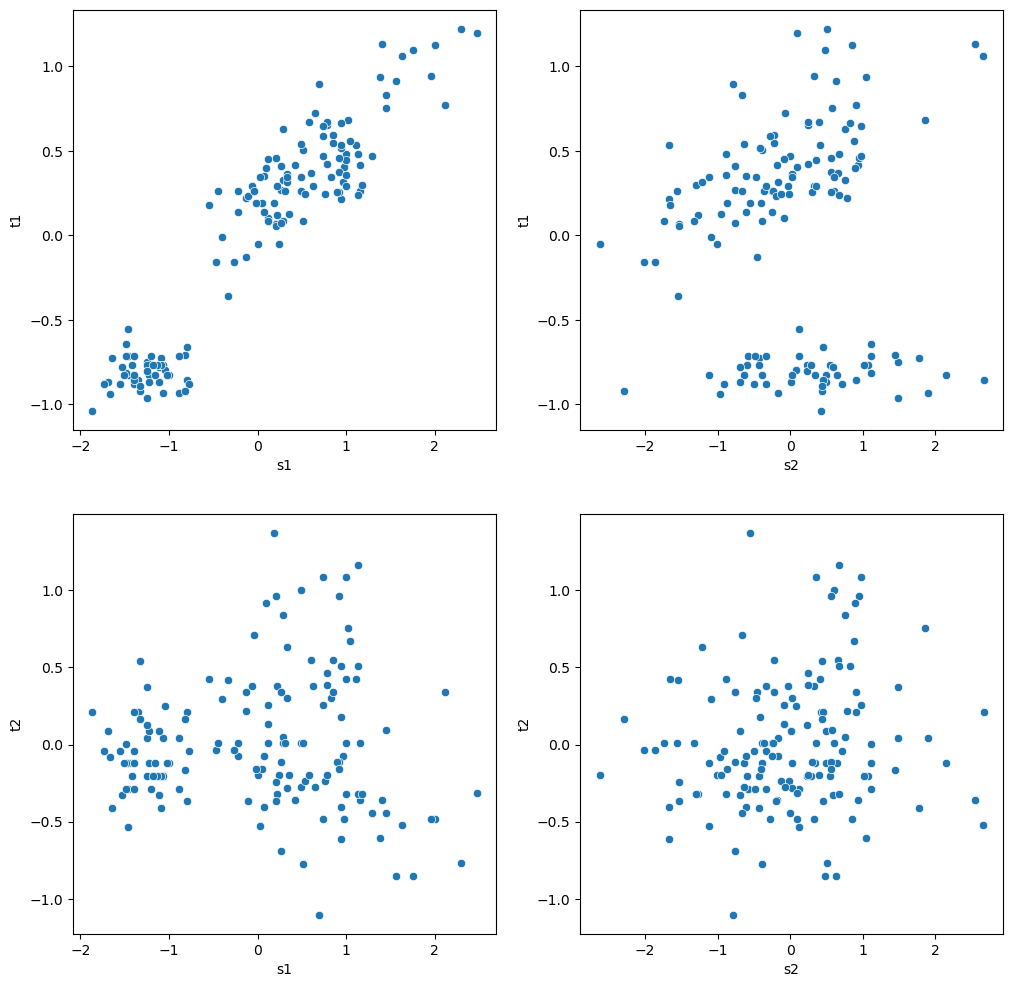

In [11]:
#%% 2 * 2 scater plot

fig = plt.figure(figsize = (12,12))

plt.subplot(2, 2, 1)
sns.scatterplot(x="s1",
                y="t1", 
                data=S_T_df_species)


plt.subplot(2, 2, 2)
sns.scatterplot(x="s2",
                y="t1", 
                data=S_T_df_species)

plt.subplot(2, 2, 3)
sns.scatterplot(x="s1",
                y="t2", 
                data=S_T_df_species)

plt.subplot(2, 2, 4)
sns.scatterplot(x="s2",
                y="t2", 
                data=S_T_df_species)

plt.show()

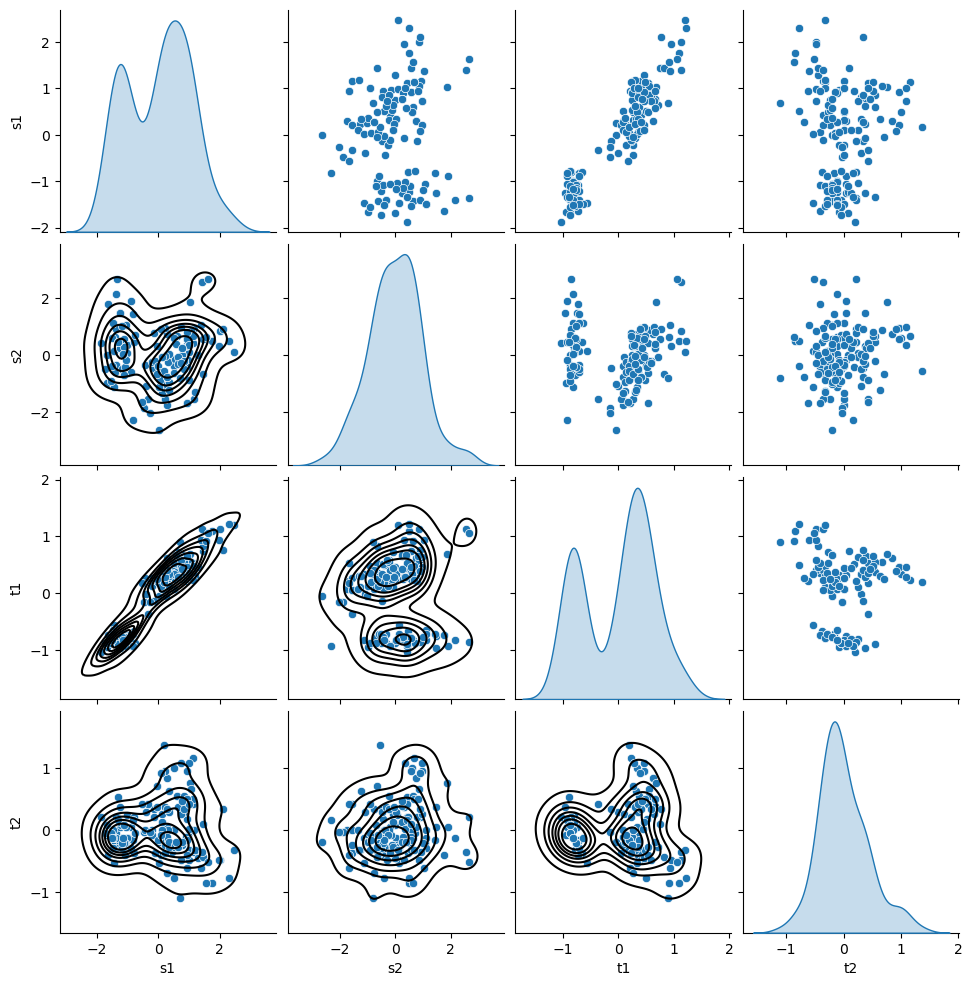

In [12]:
#%% pairwise plot

g = sns.pairplot(S_T_df_species, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=8, color="k")

In [13]:
#%% standardize original X Y
# z scores

X_c = (X - X.mean())/X.std()
Y_c = (Y - Y.mean())/Y.std()

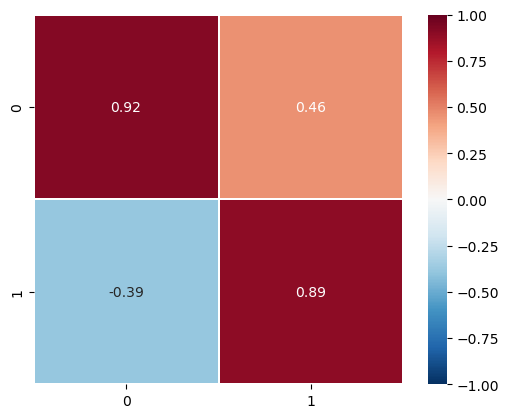

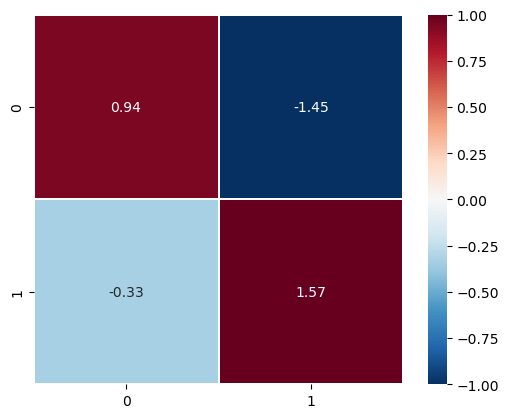

In [14]:
#%% a, two vectors to project X

U = Iris_CCA.x_rotations_
V = Iris_CCA.y_rotations_

# print(Iris_CCA.x_rotations_)
# print(Iris_CCA.x_rotations_[:,[0]])
# print(Iris_CCA.y_rotations_)
# print(Iris_CCA.y_rotations_[:,[0]])

u1 = U[:,[0]]
v1 = V[:,[0]]

fig, axs = plt.subplots()

h = sns.heatmap(U,cmap='RdBu_r', 
                linewidths=.05,
                vmax = 1, vmin = -1,
                annot=True,fmt='.2f')
h.set_aspect("equal")

fig, axs = plt.subplots()

h = sns.heatmap(V,cmap='RdBu_r', 
                linewidths=.05,
                vmax = 1, vmin = -1,
                annot=True,fmt='.2f')
h.set_aspect("equal")

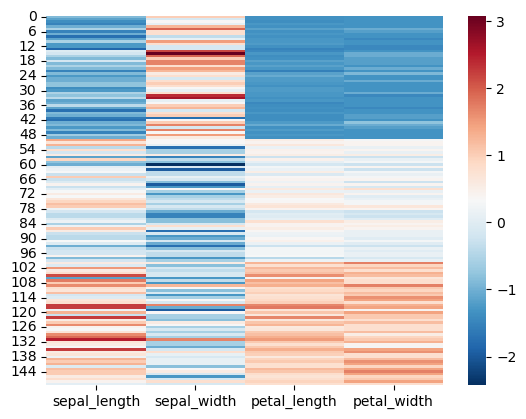

In [15]:
#%% standardize the data

Z_df = (X_df - X_df.mean())/X_df.std()

fig, axs = plt.subplots()

h = sns.heatmap(Z_df,cmap='RdBu_r')
# h.set_aspect("equal")

In [16]:
#%% projection 

s1_ = X_c @ u1
t1_ = Y_c @ v1

#%% reproduce the results using EVD

SIGMA = np.array(iris_sns.corr())

#%% eigendecomposition 

Sigma_XX = SIGMA[0:2,0:2]
Sigma_XY = SIGMA[0:2,2:4]
Sigma_YX = SIGMA[2:4,0:2]
Sigma_YY = SIGMA[2:4,2:4]

Sigma_XX_inv = np.linalg.inv(Sigma_XX)
Sigma_YY_inv = np.linalg.inv(Sigma_YY)

P = Sigma_XX_inv @ Sigma_XY @ Sigma_YY_inv @ Sigma_YX

Q = Sigma_YY_inv @ Sigma_YX @ Sigma_XX_inv @ Sigma_XY

C:\Users\james\AppData\Local\Temp\ipykernel_8644\2876686185.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  SIGMA = np.array(iris_sns.corr())


Text(0.5, 1.0, '$\\Sigma_{YX}$')

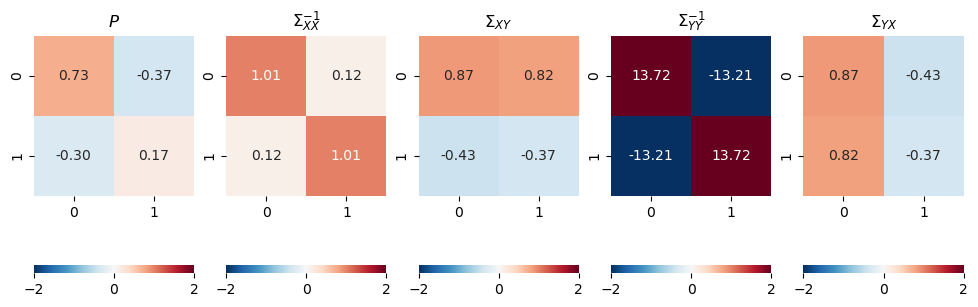

In [17]:
#%% heatmap of computing P and Q

fig, axs = plt.subplots(1, 5, figsize=(12, 6))
vmax = 2
vmin = -2

plt.sca(axs[0])
ax = sns.heatmap(P,cmap='RdBu_r',
                 annot=True,fmt='.2f',linecolor='black',
                 vmax = vmax, vmin = vmin,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title(r'$P$')

plt.sca(axs[1])
ax = sns.heatmap(Sigma_XX_inv,cmap='RdBu_r',
                 annot=True,fmt='.2f',linecolor='black',
                 vmax = vmax, vmin = vmin,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title(r'$\Sigma_{XX}^{-1}$')

plt.sca(axs[2])
ax = sns.heatmap(Sigma_XY,cmap='RdBu_r',
                 annot=True,fmt='.2f',linecolor='black',
                 vmax = vmax, vmin = vmin,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title(r'$\Sigma_{XY}$')

plt.sca(axs[3])
ax = sns.heatmap(Sigma_YY_inv,cmap='RdBu_r',
                 annot=True,fmt='.2f',linecolor='black',
                 vmax = vmax, vmin = vmin,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title(r'$\Sigma_{YY}^{-1}$')

plt.sca(axs[4])
ax = sns.heatmap(Sigma_YX,cmap='RdBu_r',
                 annot=True,fmt='.2f',linecolor='black',
                 vmax = vmax, vmin = vmin,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title(r'$\Sigma_{YX}$')

Text(0.5, 1.0, '$\\Sigma_{XY}$')

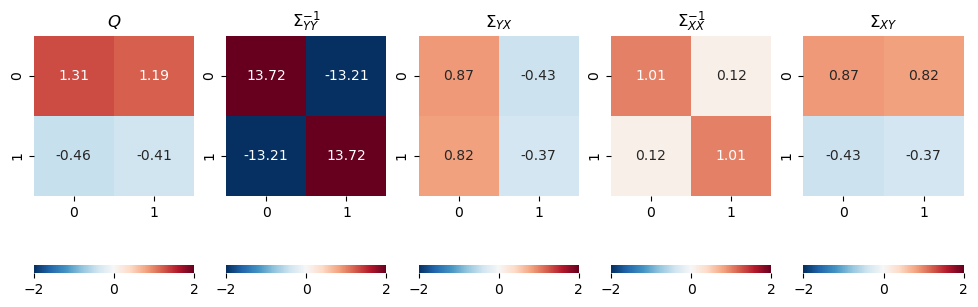

In [18]:
fig, axs = plt.subplots(1, 5, figsize=(12, 6))
vmax = 2
vmin = -2

plt.sca(axs[0])
ax = sns.heatmap(Q,cmap='RdBu_r',
                 annot=True,fmt='.2f',linecolor='black',
                 vmax = vmax, vmin = vmin,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title(r'$Q$')

plt.sca(axs[1])
ax = sns.heatmap(Sigma_YY_inv,cmap='RdBu_r',
                 annot=True,fmt='.2f',linecolor='black',
                 vmax = vmax, vmin = vmin,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title(r'$\Sigma_{YY}^{-1}$')

plt.sca(axs[2])
ax = sns.heatmap(Sigma_YX,cmap='RdBu_r',
                 annot=True,fmt='.2f',linecolor='black',
                 vmax = vmax, vmin = vmin,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title(r'$\Sigma_{YX}$')

plt.sca(axs[3])
ax = sns.heatmap(Sigma_XX_inv,cmap='RdBu_r',
                 annot=True,fmt='.2f',linecolor='black',
                 vmax = vmax, vmin = vmin,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title(r'$\Sigma_{XX}^{-1}$')

plt.sca(axs[4])
ax = sns.heatmap(Sigma_XY,cmap='RdBu_r',
                 annot=True,fmt='.2f',linecolor='black',
                 vmax = vmax, vmin = vmin,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title(r'$\Sigma_{XY}$')

In [19]:
#%% heatmap of eigvalue decomposition

Lambda_U, U = np.linalg.eig(P)
Lambda_U = np.diag(Lambda_U)
U_inv = np.linalg.inv(U)


Lambda_V, V = np.linalg.eig(Q)
Lambda_V = np.diag(Lambda_V)
V_inv = np.linalg.inv(V)

Text(0.5, 1.0, '$U^{-1}$')

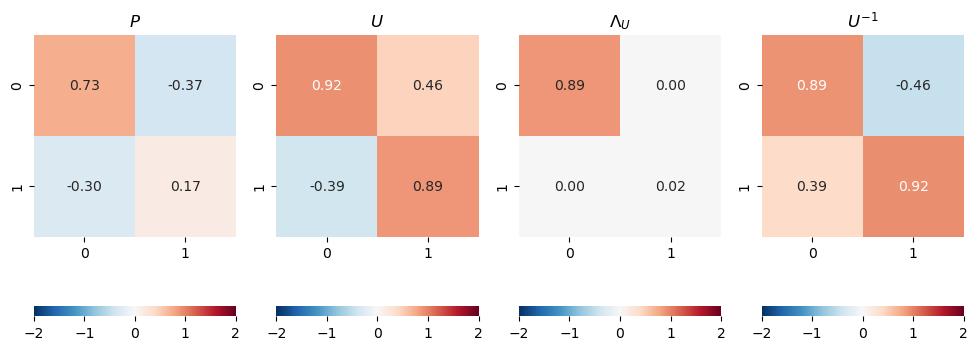

In [20]:
# EVD of P
fig, axs = plt.subplots(1, 4, figsize=(12, 6))
vmax = 2
vmin = -2

plt.sca(axs[0])
ax = sns.heatmap(P,cmap='RdBu_r',
                 annot=True,fmt='.2f',linecolor='black',
                 vmax = vmax, vmin = vmin,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title(r'$P$')

plt.sca(axs[1])
ax = sns.heatmap(U,cmap='RdBu_r',
                 annot=True,fmt='.2f',linecolor='black',
                 vmax = vmax, vmin = vmin,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title(r'$U$')

plt.sca(axs[2])
ax = sns.heatmap(Lambda_U,cmap='RdBu_r',
                 annot=True,fmt='.2f',linecolor='black',
                 vmax = vmax, vmin = vmin,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title(r'$\Lambda_U$')

plt.sca(axs[3])
ax = sns.heatmap(U_inv,cmap='RdBu_r',
                 annot=True,fmt='.2f',linecolor='black',
                 vmax = vmax, vmin = vmin,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title(r'$U^{-1}$')

Text(0.5, 1.0, '$V^{-1}$')

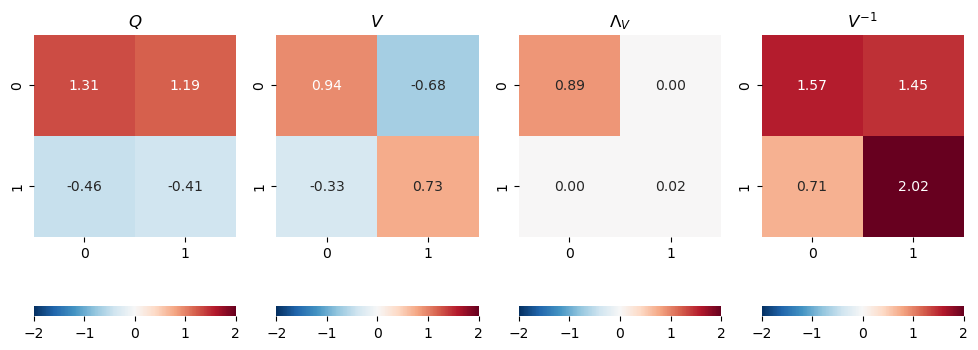

In [21]:
# EVD of Q
fig, axs = plt.subplots(1, 4, figsize=(12, 6))
vmax = 2
vmin = -2

plt.sca(axs[0])
ax = sns.heatmap(Q,cmap='RdBu_r',
                 annot=True,fmt='.2f',linecolor='black',
                 vmax = vmax, vmin = vmin,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title(r'$Q$')

plt.sca(axs[1])
ax = sns.heatmap(V,cmap='RdBu_r',
                 annot=True,fmt='.2f',linecolor='black',
                 vmax = vmax, vmin = vmin,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title(r'$V$')

plt.sca(axs[2])
ax = sns.heatmap(Lambda_V,cmap='RdBu_r',
                 annot=True,fmt='.2f',linecolor='black',
                 vmax = vmax, vmin = vmin,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title(r'$\Lambda_V$')

plt.sca(axs[3])
ax = sns.heatmap(V_inv,cmap='RdBu_r',
                 annot=True,fmt='.2f',linecolor='black',
                 vmax = vmax, vmin = vmin,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title(r'$V^{-1}$')